<a href="https://colab.research.google.com/github/iamkishan98/Deep-learning-assignments/blob/master/Balancedset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/Deep Learning Course 2020/classification data/')
print(os.getcwd())

/content/drive/My Drive/Deep Learning Course 2020/classification data


In [20]:
# Balanced Dataset

import numpy as np
from matplotlib import pyplot as plt
bal_xtrain = np.load("Balanced_PCB/xtrain.npy")
bal_ytrain = np.load("Balanced_PCB/ytrain.npy")
print(bal_xtrain)
print(bal_xtrain.shape)
print(bal_ytrain)
print(bal_ytrain.shape)

[[[[ 50  44  27]
   [ 22  23   9]
   [ 11  17  10]
   ...
   [ 13  30  38]
   [ 13  31  39]
   [ 11  31  39]]

  [[ 88  78  48]
   [ 40  36  16]
   [ 17  20  10]
   ...
   [ 13  30  38]
   [ 14  31  40]
   [ 12  31  39]]

  [[133 118  78]
   [ 62  58  31]
   [ 24  25  14]
   ...
   [ 13  31  38]
   [ 13  31  39]
   [ 12  31  40]]

  ...

  [[212 173 105]
   [216 173 107]
   [219 174 111]
   ...
   [206 170 110]
   [210 173 110]
   [211 173 108]]

  [[214 172 104]
   [218 175 109]
   [221 176 112]
   ...
   [205 169 110]
   [214 173 111]
   [217 177 112]]

  [[219 174 106]
   [222 179 112]
   [223 178 111]
   ...
   [209 171 114]
   [219 176 116]
   [223 179 115]]]


 [[[ 79  81  72]
   [131 120  93]
   [170 152 107]
   ...
   [ 17  31  36]
   [ 22  36  40]
   [ 29  46  48]]

  [[ 60  67  67]
   [103 100  82]
   [156 140 104]
   ...
   [ 17  31  35]
   [ 21  35  38]
   [ 29  47  48]]

  [[ 55  66  71]
   [ 70  78  72]
   [108 104  82]
   ...
   [ 17  31  34]
   [ 20  35  37]
   [ 30  48

In [0]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [22]:
#import numpy as  np
bal_xtrain = bal_xtrain.astype('float32')

print(np.max(bal_xtrain) ,np.max(bal_ytrain))
print(np.min(bal_xtrain) , np.min(bal_ytrain))

mean = np.mean(bal_xtrain)
std = np.std(bal_xtrain)
print(mean)
print(std)

bal_xtrain -=mean
bal_xtrain /=std

print(np.max(bal_xtrain) ,np.max(bal_ytrain))
print(np.min(bal_xtrain) , np.min(bal_ytrain))



255.0 1.0
0.0 0.0
52.748867
52.869015
3.8255136 1.0
-0.99772745 0.0


In [7]:
from keras.utils import to_categorical
bal_ytrain = to_categorical(bal_ytrain)
print(bal_ytrain[149])

[[1. 0.]
 [0. 1.]]


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import metrics
from tensorflow.keras import layers

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0


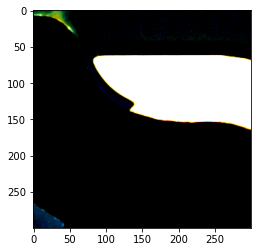

In [24]:
keras.utils.normalize(bal_xtrain, axis=1 , order=2)
plt.imshow(bal_xtrain[149],cmap='gray')
#plt.imshow(bal_ytrain[145])
print(bal_ytrain[149])

In [0]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(bal_xtrain , bal_ytrain , test_size =0.25)

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(16,(5,5), input_shape=(300,300,3) , activation='relu' ,strides=(1,1) , padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2) , strides=(2,2)))


model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))


model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 296, 296, 16)      1216      
_________________________________________________________________
average_pooling2d_6 (Average (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 144, 144, 16)      6416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 72, 72, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               9953400   
_________________________________________________________________
dense_10 (Dense)             (None, 84)               

In [27]:
#model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#tf.keras.metrics.SparseCategoricalAccuracy(
 #   name='sparse_categorical_accuracy', dtype=None
#)

model.compile(optimizer=keras.optimizers.SGD(),  # Optimizer
              # Loss function to minimize
              #loss ='mean_squared_error',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              # List of metrics to monitor
              metrics=['sparse_categorical_accuracy'])

history=model.fit(X_train,y_train,epochs=30,verbose=1)




Epoch 1/30
7/7 [==============================] - 10s 1s/step - loss: 0.6694 - sparse_categorical_accuracy: 0.6457
Epoch 2/30
7/7 [==============================] - 10s 1s/step - loss: 0.5920 - sparse_categorical_accuracy: 0.8072
Epoch 3/30
7/7 [==============================] - 10s 1s/step - loss: 0.5209 - sparse_categorical_accuracy: 0.8520
Epoch 4/30
7/7 [==============================] - 10s 1s/step - loss: 0.4701 - sparse_categorical_accuracy: 0.8655
Epoch 5/30
7/7 [==============================] - 10s 1s/step - loss: 0.4343 - sparse_categorical_accuracy: 0.9148
Epoch 6/30
7/7 [==============================] - 10s 1s/step - loss: 0.4172 - sparse_categorical_accuracy: 0.9327
Epoch 7/30
7/7 [==============================] - 10s 1s/step - loss: 0.4013 - sparse_categorical_accuracy: 0.9417
Epoch 8/30
7/7 [==============================] - 10s 1s/step - loss: 0.3877 - sparse_categorical_accuracy: 0.9462
Epoch 9/30
7/7 [==============================] - 10s 1s/step - loss: 0.3800 - s

In [28]:
test_loss , test_acc = model.evaluate(X_test,y_test)
print("Test Acc : ", test_acc) 
print("Test loss : ",test_loss)

3/3 [==============================] - 1s 198ms/step - loss: 0.4332 - sparse_categorical_accuracy: 0.8667
Test Acc :  0.8666666746139526
Test loss :  0.43322089314460754
